### NN Classification problem

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv('./WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


#### Lets set the quality of wine as good when quality is 6 and others to lower quality

In [6]:
data['Good'] = [1 if quality >=6 else 0 for quality in data['quality']]

In [7]:
data.drop(columns='quality', inplace=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,Good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595,1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = data.drop(columns='Good').values
y = data['Good'].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc =StandardScaler()

In [13]:
x_train_scaled = sc.fit_transform(x_train)

In [14]:
x_test_scaled= sc.transform(x_test)

In [15]:
tf.random.set_seed(42)

model= tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name= 'accuarcy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ],
    loss=tf.keras.losses.binary_crossentropy
)

In [17]:
history = model.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
29/29 [==============================] - 2s 3ms/step - loss: 0.9133 - accuarcy: 0.6554 - precision: 0.7178 - recall: 0.5972
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5615 - accuarcy: 0.7429 - precision: 0.7846 - recall: 0.7227
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5207 - accuarcy: 0.7659 - precision: 0.7941 - recall: 0.7652
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5189 - accuarcy: 0.7626 - precision: 0.7844 - recall: 0.7733
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5088 - accuarcy: 0.7593 - precision: 0.7819 - recall: 0.7692
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 0.4897 - accuarcy: 0.7702 - precision: 0.7886 - recall: 0.7854
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 0.4863 - accuarcy: 0.7713 - precision: 0.7833 - recall: 0.7976
Epoch 8/100
29/29 [=============================

29/29 [==============================] - 0s 3ms/step - loss: 0.2641 - accuarcy: 0.8665 - precision: 0.8207 - recall: 0.9636
Epoch 61/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2866 - accuarcy: 0.8567 - precision: 0.8040 - recall: 0.9717
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4048 - accuarcy: 0.8545 - precision: 0.8491 - recall: 0.8887
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3211 - accuarcy: 0.8348 - precision: 0.8595 - recall: 0.8300
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3145 - accuarcy: 0.8556 - precision: 0.8267 - recall: 0.9271
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2927 - accuarcy: 0.8567 - precision: 0.8071 - recall: 0.9656
Epoch 66/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3556 - accuarcy: 0.8403 - precision: 0.7929 - recall: 0.9534
Epoch 67/100
29/29 [==============================] - 

### Model evaluation

In [18]:
from matplotlib import rcParams

In [19]:
rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

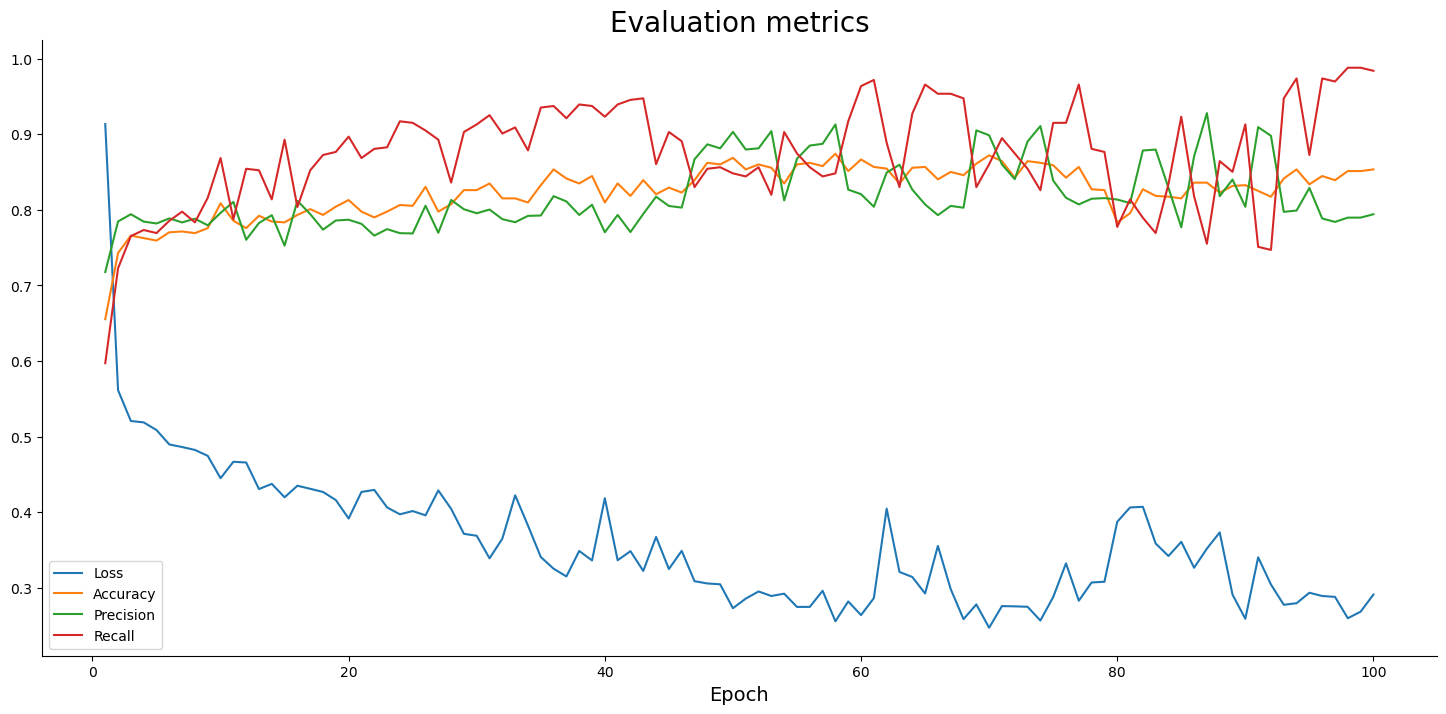

In [21]:
plt.plot(np.arange(1, 101), history.history['loss'], label = 'Loss')
plt.plot(np.arange(1, 101), history.history['accuarcy'], label = 'Accuracy')
plt.plot(np.arange(1, 101), history.history['precision'], label = 'Precision')
plt.plot(np.arange(1, 101), history.history['recall'], label = 'Recall')
plt.title('Evaluation metrics', size = 20)
plt.xlabel('Epoch', size=14)
plt.legend();

### Prediction probability

In [22]:
predictions = model.predict(x_test_scaled)

8/8 [==============================] - 0s 2ms/step


In [23]:
predictions

array([[3.11818123e-01],
       [5.34873843e-01],
       [1.81561394e-04],
       [5.34873843e-01],
       [5.34873843e-01],
       [9.99987364e-01],
       [4.57347342e-04],
       [5.32225022e-06],
       [9.99988735e-01],
       [6.99788192e-03],
       [5.34873843e-01],
       [9.54263985e-01],
       [9.80730236e-01],
       [9.09022391e-01],
       [5.34873843e-01],
       [7.21407067e-09],
       [5.34873843e-01],
       [5.07429987e-03],
       [5.34873843e-01],
       [9.99256015e-01],
       [7.68070161e-01],
       [5.34873843e-01],
       [5.34873843e-01],
       [9.92513835e-01],
       [4.45907980e-01],
       [1.02107851e-02],
       [9.99543965e-01],
       [5.34873843e-01],
       [8.38989422e-07],
       [5.75769305e-01],
       [5.34873843e-01],
       [9.99994278e-01],
       [5.34873843e-01],
       [1.65642247e-01],
       [7.65854446e-03],
       [3.38276266e-15],
       [7.66059477e-03],
       [8.17749500e-01],
       [9.99795556e-01],
       [5.34873843e-01],


In [24]:
prediction_classes = [1 if prob >0.5 else 0 for prob in np.ravel(predictions)]

In [26]:
prediction_classes[:20]

[0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]

### Confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
print(confusion_matrix(y_test, prediction_classes))

[[ 63  39]
 [ 16 111]]


In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [30]:
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.76
Precision: 0.74
Recall: 0.87
